In [ ]:
!gdown 1Ht0i1mpS0e5cKDAO0zI8reTMBEzw4soj

Downloading...
From: https://drive.google.com/uc?id=1Ht0i1mpS0e5cKDAO0zI8reTMBEzw4soj
To: /content/3col80_5_2.shuffled.cnf.wcnf
100% 15.2k/15.2k [00:00<00:00, 53.5MB/s]


# **different parameters**

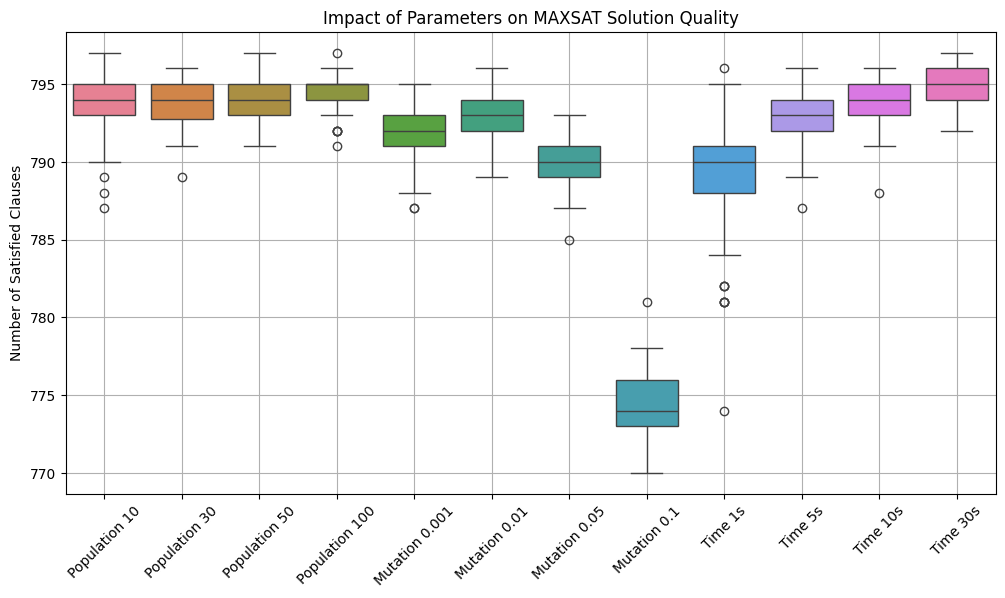

In [ ]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def is_clause_satisfied_optimized(clause_literals, assignment):
    """Check if a clause is satisfied by the assignment."""
    for literal in clause_literals:
        var_index = abs(literal) - 1  # Convert 1-based index to 0-based
        if (literal > 0 and assignment[var_index] == 1) or (literal < 0 and assignment[var_index] == 0):
            return 1
    return 0

def load_clauses(wdimacs_file):
    """Load clauses from the WDIMACS file."""
    clauses = []
    num_vars = None

    with open(wdimacs_file, "r") as file:
        for line in file:
            line = line.strip()
            if line.startswith("p wcnf"):
                num_vars = int(line.split()[2])
            elif not line.startswith("c"):
                clause_literals = list(map(int, line.split()[1:-1]))  # Keep as lists, not NumPy arrays
                clauses.append(clause_literals)

    return num_vars, clauses

def count_satisfied_clauses_optimized(clauses, assignment):
    """Count satisfied clauses."""
    return sum(is_clause_satisfied_optimized(clause, assignment) for clause in clauses)

def evolutionary_algorithm(wdimacs_file, time_budget, repetitions, population_size=30, mutation_rate=0.01):
    """Run the evolutionary algorithm and return the number of satisfied clauses."""
    results = []
    num_vars, clauses = load_clauses(wdimacs_file)

    for _ in range(repetitions):
        population = [np.random.randint(0, 2, num_vars, dtype=np.uint8) for _ in range(population_size)]
        fitness_scores = np.array([count_satisfied_clauses_optimized(clauses, individual) for individual in population])
        best_index = np.argmax(fitness_scores)
        best_solution, best_fitness = population[best_index], fitness_scores[best_index]

        start_time = time.time()
        generations = 0

        while time.time() - start_time < time_budget:
            generations += 1

            # Selection using fitness proportion
            total_fitness = sum(fitness_scores)
            probabilities = fitness_scores / total_fitness
            selected = [population[i] for i in np.random.choice(len(population), size=population_size, p=probabilities)]

            # Uniform Crossover
            offspring = []
            for i in range(0, population_size, 2):
                parent1, parent2 = selected[i], selected[i+1]
                mask = np.random.rand(num_vars) < 0.5
                child1, child2 = np.copy(parent1), np.copy(parent2)
                child1[mask], child2[mask] = child2[mask], child1[mask]
                offspring.extend([child1, child2])

            # Mutation
            for child in offspring:
                mutation_mask = np.random.rand(num_vars) < mutation_rate
                child[mutation_mask] ^= 1  # Flip bits

            # Evaluate new population
            new_fitness_scores = np.array([count_satisfied_clauses_optimized(clauses, individual) for individual in offspring])

            # Keep best individuals
            combined_population = population + offspring
            combined_fitness = np.concatenate((fitness_scores, new_fitness_scores))
            sorted_indices = np.argsort(combined_fitness)[-population_size:]  # Keep top individuals
            population = [combined_population[i] for i in sorted_indices]
            fitness_scores = combined_fitness[sorted_indices]

            # Update best solution
            best_index = np.argmax(fitness_scores)
            if fitness_scores[best_index] > best_fitness:
                best_solution, best_fitness = population[best_index], fitness_scores[best_index]

        # Store results
        results.append(best_fitness)

    return results

# Define parameter values to test
population_sizes = [10, 30, 50, 100]
mutation_rates = [0.001, 0.01, 0.05, 0.1]
time_budgets = [1, 5, 10, 30]

wdimacs_filename = "/content/3col80_5_2.shuffled.cnf.wcnf"
# Store results
experiment_results = {}

# Run experiments for different parameters
for pop_size in population_sizes:
    experiment_results[f"Population {pop_size}"] = evolutionary_algorithm(wdimacs_filename, 10, 100, pop_size, 0.01)

for mut_rate in mutation_rates:
    experiment_results[f"Mutation {mut_rate}"] = evolutionary_algorithm(wdimacs_filename, 10, 100, 30, mut_rate)

for time_budget in time_budgets:
    experiment_results[f"Time {time_budget}s"] = evolutionary_algorithm(wdimacs_filename, time_budget, 100, 30, 0.01)

# Convert results into a DataFrame for visualization
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in experiment_results.items()]))

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.ylabel("Number of Satisfied Clauses")
plt.title("Impact of Parameters on MAXSAT Solution Quality")
plt.grid(True)
plt.show()


=== Experiment Results Summary ===
Population 10:
  Max: 797
  Min: 787
  Avg: 793.72
  All values (first 10): [np.int64(793), np.int64(794), np.int64(794), np.int64(788), np.int64(792), np.int64(793), np.int64(797), np.int64(793), np.int64(793), np.int64(790)]

Population 30:
  Max: 796
  Min: 789
  Avg: 793.61
  All values (first 10): [np.int64(792), np.int64(795), np.int64(793), np.int64(795), np.int64(794), np.int64(793), np.int64(794), np.int64(792), np.int64(796), np.int64(796)]

Population 50:
  Max: 797
  Min: 791
  Avg: 794.25
  All values (first 10): [np.int64(795), np.int64(796), np.int64(793), np.int64(794), np.int64(795), np.int64(796), np.int64(795), np.int64(794), np.int64(793), np.int64(794)]

Population 100:
  Max: 797
  Min: 791
  Avg: 794.51
  All values (first 10): [np.int64(795), np.int64(795), np.int64(794), np.int64(796), np.int64(793), np.int64(791), np.int64(794), np.int64(793), np.int64(794), np.int64(795)]

Mutation 0.001:
  Max: 795
  Min: 787
  Avg: 791.62


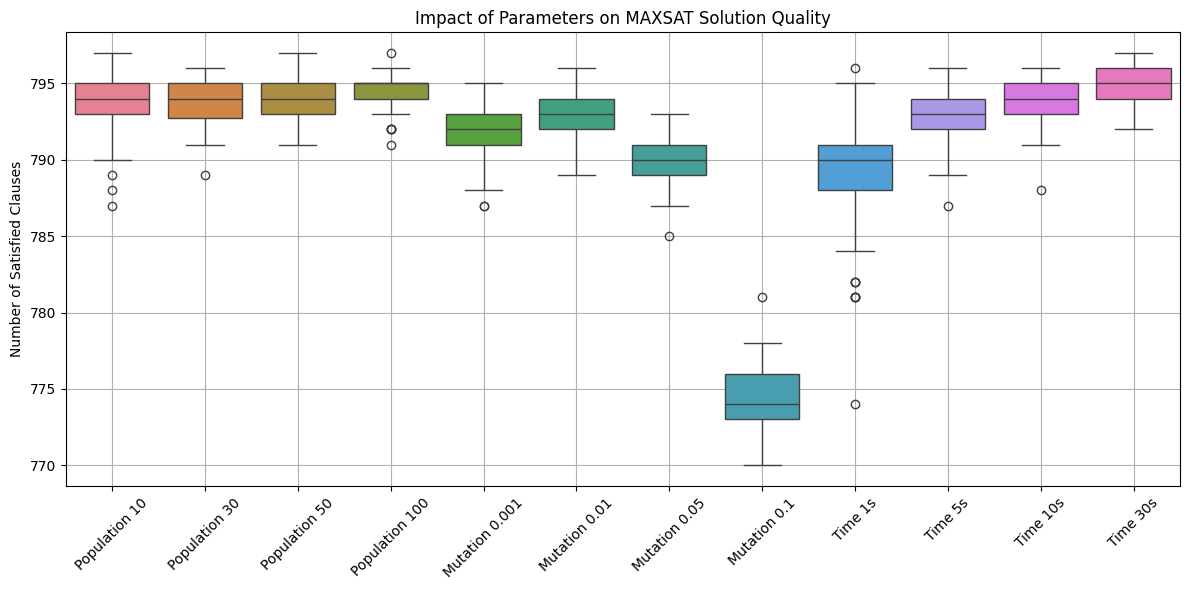

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Print the results in a readable format
print("=== Experiment Results Summary ===")
for param, values in experiment_results.items():
    print(f"{param}:")
    print(f"  Max: {max(values)}")
    print(f"  Min: {min(values)}")
    print(f"  Avg: {sum(values)/len(values):.2f}")
    print(f"  All values (first 10): {values[:10]}")
    print()

# Convert to DataFrame for visualization
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in experiment_results.items()]))

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.ylabel("Number of Satisfied Clauses")
plt.title("Impact of Parameters on MAXSAT Solution Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


Results saved to maxsat_experiment_results.csv
Boxplot saved to maxsat_boxplot.png


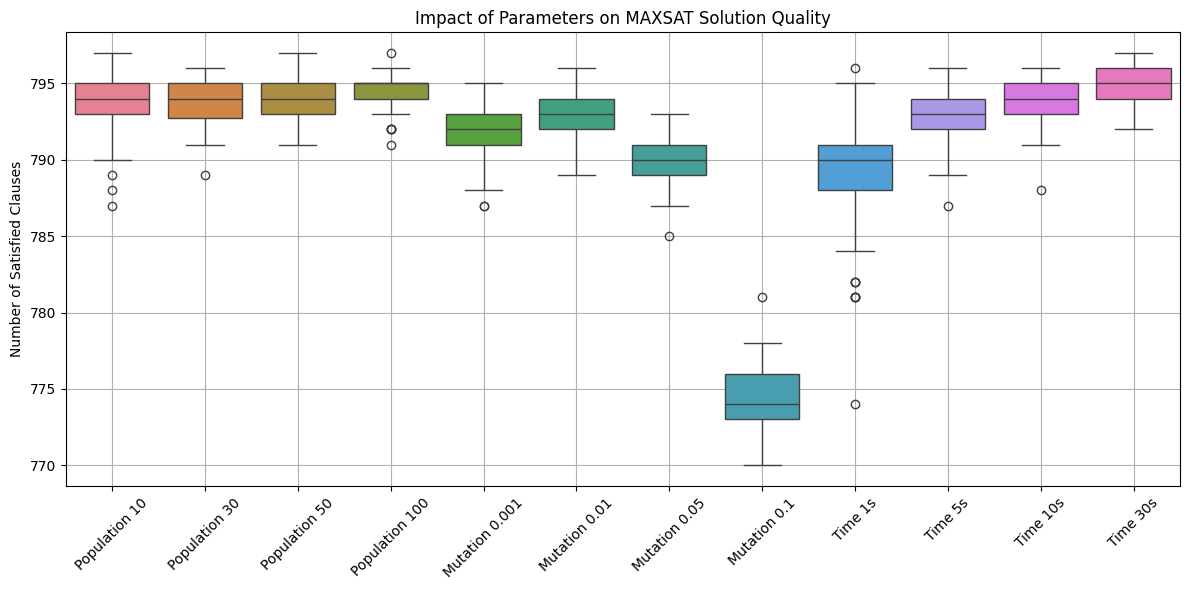

In [ ]:

# === SAVE RESULTS TO CSV ===
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in experiment_results.items()]))
csv_filename = "maxsat_experiment_results.csv"
df.to_csv(csv_filename, index=False)
print(f"Results saved to {csv_filename}")

# === SAVE BOXPLOT TO PNG ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.ylabel("Number of Satisfied Clauses")
plt.title("Impact of Parameters on MAXSAT Solution Quality")
plt.grid(True)
plt.tight_layout()
image_filename = "maxsat_boxplot.png"
plt.savefig(image_filename)
print(f"Boxplot saved to {image_filename}")
plt.show()